### Paquetes a Importar

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist, fashion_mnist
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


### Cargar los Datasets

In [3]:
# Cargar el dataset MNIST
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

# Cargar el dataset Fashion MNIST
(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = fashion_mnist.load_data()


### Normalización de los Datos

Es una buena práctica normalizar los datos de entrada para que los valores de los píxeles estén en el rango de 0 a 1. Esto ayuda a mejorar el entrenamiento del modelo al mantener los valores de entrada pequeños.

In [4]:
x_train_mnist, x_test_mnist = x_train_mnist / 255.0, x_test_mnist / 255.0
x_train_fashion, x_test_fashion = x_train_fashion / 255.0, x_test_fashion / 255.0

### Visualización de las Imágenes

In [5]:
def plot_images(images, labels, indices, title, color='bone'):
    # Calcula el número de imágenes
    n_images = len(indices)

    # Determina las filas y columnas basadas en la cantidad de imágenes
    rows = int(np.sqrt(n_images))
    cols = n_images // rows if n_images % rows == 0 else n_images // rows + 1

    # Configura la figura
    fig = plt.figure(figsize=(cols*2, rows*2))
    fig.suptitle(title, fontsize=16)
    # Itera sobre el número de índices y muestra las imágenes correspondientes
    for i, idx in enumerate(indices):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.set_title(f"Label: {labels[idx]}")
        ax.imshow(images[idx])
        ax.axis('off')
    plt.show()


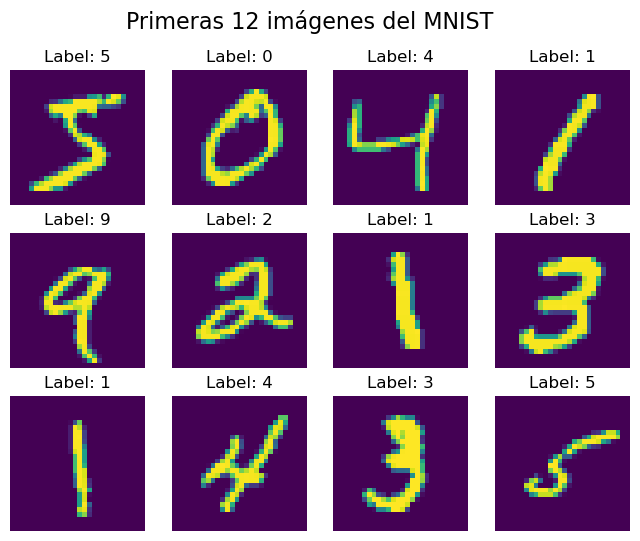

In [6]:
cant = 12
indices = list(range(0, cant, 1))
plot_images(x_train_mnist,y_train_mnist, indices,"Primeras " +str(cant)+ " imágenes del MNIST")

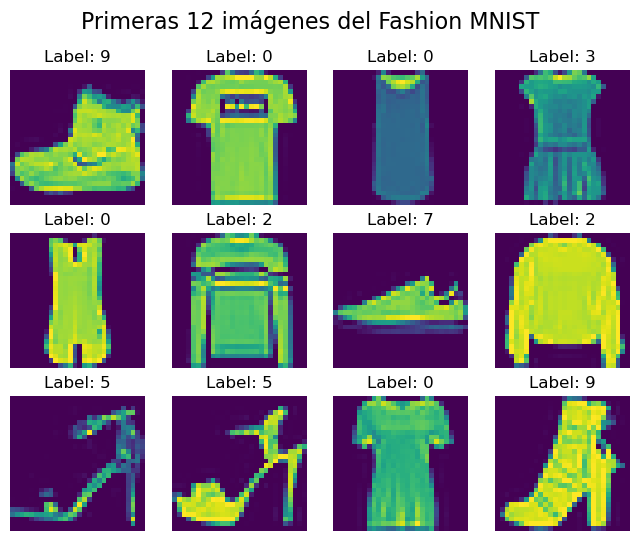

In [7]:
plot_images(x_train_fashion,y_train_fashion, indices, "Primeras " +str(cant)+ " imágenes del Fashion MNIST")

# Modelos

## Preparación de los Datos
Considerando que los modelos esperan vectores en lugar de imágenes, aplanaré las imágenes para que queden en forma de vectores

In [8]:
# Aplanar las imágenes para modelos de caja blanca
x_train_mnist_flat = x_train_mnist.reshape((x_train_mnist.shape[0], -1))
x_test_mnist_flat = x_test_mnist.reshape((x_test_mnist.shape[0], -1))
x_train_fashion_flat = x_train_fashion.reshape((x_train_fashion.shape[0], -1))
x_test_fashion_flat = x_test_fashion.reshape((x_test_fashion.shape[0], -1))

### Función `evaluate_model`
Para garantizar un código eficiente y fácil de mantener en mi proyecto de análisis de modelos de aprendizaje automático, desarrollé una función genérica denominada `evaluate_model`. Esta función me permite evaluar cualquier modelo de clasificación y visualizar sus resultados de manera estandarizada. Su propósito es realizar predicciones con el modelo proporcionado, generar un reporte de clasificación detallado y visualizar una matriz de confusión.

La función `evaluate_model` recibe varios argumentos: el modelo entrenado (`model`), los datos de prueba (`X_test`), las etiquetas reales de los datos de prueba (`y_test`), un nombre descriptivo para el modelo (`model_name`), y el nombre del conjunto de datos (`dataset_name`). Con estos inputs, la función ejecuta el siguiente proceso:

* **Predicción**: Utiliza el modelo para predecir las etiquetas de los datos de prueba.
* **Reporte de Clasificación**: Calcula y muestra un informe de clasificación utilizando `classification_report` de scikit-learn, que proporciona métricas como precisión, recall y f1-score por clase, lo cual es crucial para entender el rendimiento del modelo en detalle.
* **Matriz de Confusión**: Genera y visualiza una matriz de confusión usando la biblioteca `seaborn`. Esta matriz es esencial para visualizar cómo las predicciones se comparan con las etiquetas reales, permitiéndome identificar rápidamente las clases que el modelo predice correctamente y aquellas donde se equivoca.

Además esta función retorna los valores predichos, por si es necesario utilziar posteriormente

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, model_name, dataset_name):
    """
    Función para evaluar un modelo y visualizar la matriz de confusión.
    Args:
    - model: modelo entrenado
    - X_test: datos de prueba (features)
    - y_test: etiquetas reales de los datos de prueba
    - model_name: nombre del modelo (para títulos)
    - dataset_name: nombre del dataset (para títulos)
    """
    # Predicción con el modelo
    predictions = model.predict(X_test)
    
    # Generar el reporte de clasificación
    report = classification_report(y_test, predictions)
    print(f"Reporte de Clasificación para el Modelo: {model_name} sobre el DataSet: {dataset_name}:\n{report}")
    
    # Crear y visualizar la matriz de confusión
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(7, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Matriz de Confusión para el Modelo: {model_name} sobre el DataSet: {dataset_name}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

    return predictions

## Modelos de Caja Blanca

### Regresión Logística

#### Crear y entrenar el modelo de Regresión Logística para MNIST

In [10]:
log_reg_mnist = LogisticRegression(max_iter=1000,random_state=42)
log_reg_mnist.fit(x_train_mnist_flat, y_train_mnist)

LogisticRegression(max_iter=1000, random_state=42)

#### Crear y entrenar el modelo de Regresión Logística para Fashion MNIST

In [11]:
log_reg_fashion = LogisticRegression(max_iter=1000,random_state=42)
log_reg_fashion.fit(x_train_fashion_flat, y_train_fashion)

LogisticRegression(max_iter=1000, random_state=42)

#### Uso de la función `evaluate_model` para cada modelo y dataset

Reporte de Clasificación para el Modelo: Regresión Logística sobre el DataSet: MNIST:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.89      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



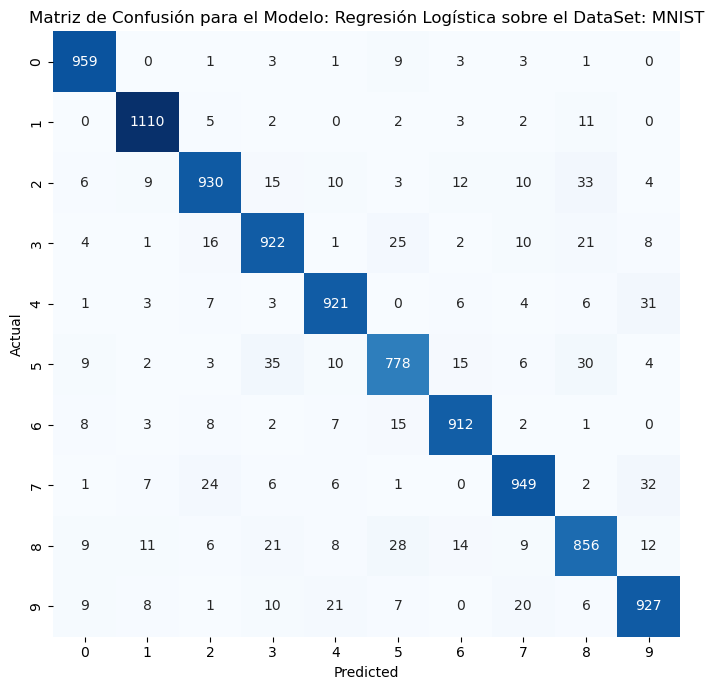

In [23]:
y_pred_mnist_log_reg = evaluate_model(log_reg_mnist, x_test_mnist_flat, y_test_mnist, "Regresión Logística", "MNIST")

Reporte de Clasificación para el Modelo: Regresión Logística sobre el DataSet: Fashion MNIST:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.97      0.96      0.96      1000
           2       0.72      0.74      0.73      1000
           3       0.83      0.86      0.84      1000
           4       0.74      0.76      0.75      1000
           5       0.95      0.92      0.93      1000
           6       0.62      0.57      0.60      1000
           7       0.91      0.94      0.93      1000
           8       0.93      0.94      0.93      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



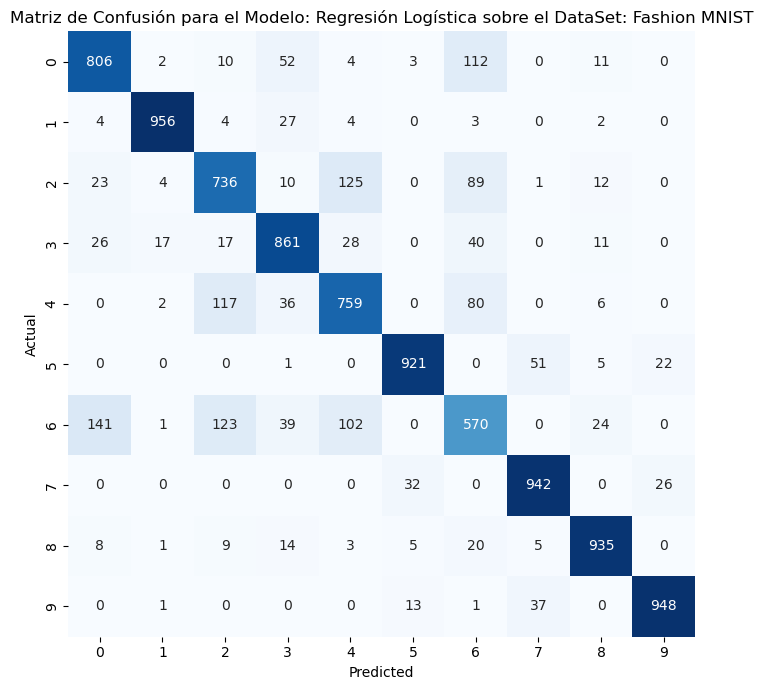

In [31]:
y_pred_mnistfashion_log_reg = evaluate_model(log_reg_fashion, x_test_fashion_flat, y_test_fashion, "Regresión Logística", "Fashion MNIST")

### Árbol de Decisión

#### Crear y entrenar el modelo de Árbol de Decisión para MNIST

In [17]:
tree_mnist = DecisionTreeClassifier(random_state=42)
tree_mnist.fit(x_train_mnist_flat, y_train_mnist)

DecisionTreeClassifier(random_state=42)

#### Crear y entrenar el modelo de Árbol de Decisión para Fashion MNIST

In [18]:
tree_fashion = DecisionTreeClassifier(random_state=42)
tree_fashion.fit(x_train_fashion_flat, y_train_fashion)

DecisionTreeClassifier(random_state=42)

#### Uso de la función `evaluate_model` para cada modelo y dataset

Reporte de Clasificación para el Modelo: Árbol de Decisión sobre el DataSet: MNIST:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.86      0.86      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.86      0.87      0.87       982
           5       0.85      0.83      0.84       892
           6       0.90      0.88      0.89       958
           7       0.91      0.90      0.91      1028
           8       0.82      0.81      0.81       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000



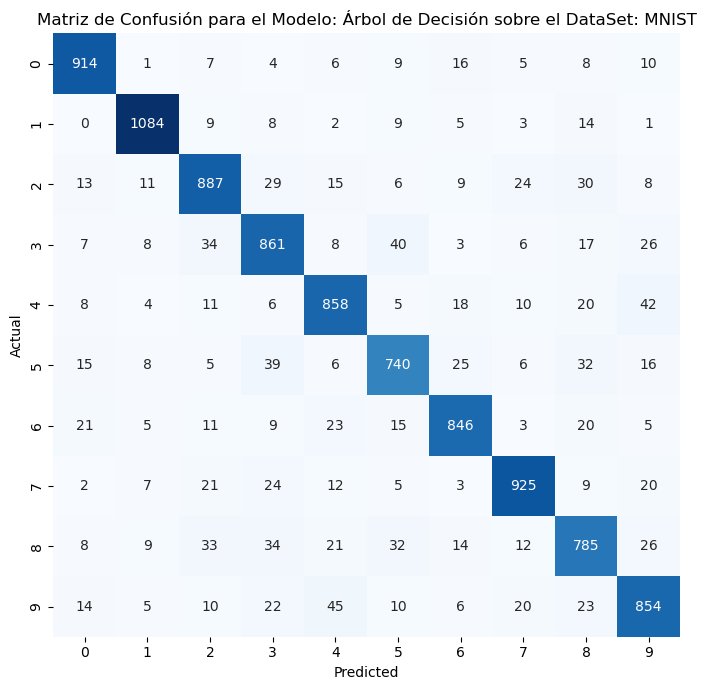

In [25]:
y_pred_mnist_tree = evaluate_model(tree_mnist, x_test_mnist_flat, y_test_mnist, "Árbol de Decisión", "MNIST")

Reporte de Clasificación para el Modelo: Árbol de Decisión sobre el DataSet: Fashion MNIST:
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1000
           1       0.96      0.95      0.95      1000
           2       0.63      0.65      0.64      1000
           3       0.82      0.79      0.80      1000
           4       0.64      0.63      0.64      1000
           5       0.90      0.89      0.89      1000
           6       0.52      0.55      0.53      1000
           7       0.87      0.88      0.88      1000
           8       0.91      0.91      0.91      1000
           9       0.90      0.91      0.91      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



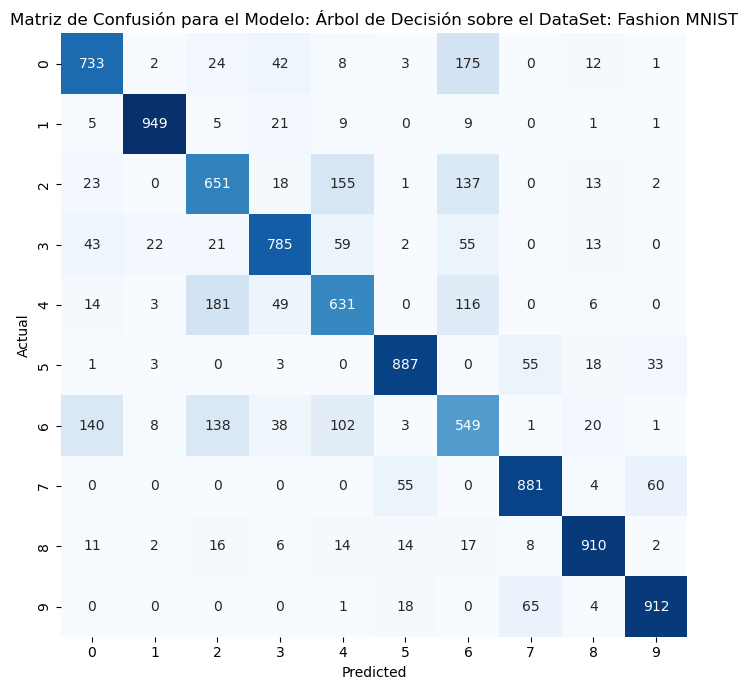

In [26]:
y_pred_mnistfashion_tree = evaluate_model(tree_fashion, x_test_fashion_flat, y_test_fashion, "Árbol de Decisión", "Fashion MNIST")

### Accuracy de los dos modelos para cada DataSet

#### MNIST

In [34]:
accuracy_log_reg_mnist = accuracy_score(y_test_mnist, y_pred_mnist_log_reg)
accuracy_tree_mnist = accuracy_score(y_test_mnist, y_pred_mnist_tree)
print("Accuracy de Regresión Logística en MNIST: ", accuracy_log_reg_mnist*100)
print("Accuracy de Árbol de Decisión en MNIST: ", accuracy_tree_mnist*100)

Accuracy de Regresión Logística en MNIST:  92.64
Accuracy de Árbol de Decisión en MNIST:  87.53999999999999


In [33]:
accuracy_log_reg_fashion = accuracy_score(y_test_fashion, y_pred_mnistfashion_log_reg)
accuracy_tree_fashion = accuracy_score(y_test_fashion, y_pred_mnistfashion_tree)
print("Accuracy de Regresión Logística en Fashion MNIST: ", accuracy_log_reg_fashion*100)
print("Accuracy de Árbol de Decisión en Fashion MNIST: ", accuracy_tree_fashion*100)

Accuracy de Regresión Logística en Fashion MNIST:  84.34
Accuracy de Árbol de Decisión en Fashion MNIST:  78.88


### Análisis de Modelos de Caja Blanca en MNIST y Fashion MNIST

#### Resultados en MNIST

- **Regresión Logística**:
  - Precisión alcanzada: **92.64%**
  - Comentarios: La precisión lograda con este modelo lineal simple es indicativa de su adecuación para clasificar los dígitos escritos a mano en MNIST, sugiriendo que las características lineales son suficientes para capturar diferencias clave entre las clases.

- **Árbol de Decisión**:
  - Precisión alcanzada: **87.54%**
  - Comentarios: Esta precisión, aunque razonablemente alta, es menor que la obtenida con la Regresión Logística. Esto podría deberse a un posible sobreajuste o a una incapacidad para manejar adecuadamente la dimensionalidad de las imágenes, lo que lleva a un rendimiento inferior, teniendo en cuenta que no se realizó ajuste de los hiperparámetros del árbol.

#### Resultados en Fashion MNIST

- **Regresión Logística**:
  - Precisión alcanzada: **84.34%**
  - Comentarios: A pesar de la complejidad visual y la variabilidad sutil entre categorías de ropa, la Regresión Logística demostró ser bastante robusta, proporcionando un buen rendimiento general. Esto destaca su utilidad incluso en contextos más complejos.

- **Árbol de Decisión**:
  - Precisión alcanzada: **78.88%**
  - Comentarios: Este es el rendimiento más bajo entre los modelos evaluados, resaltando las dificultades del Árbol de Decisión para procesar eficientemente la alta dimensionalidad y complejidad de Fashion MNIST, teniendo en cuenta que no se realizó ajuste de los hiperparámetros del árbol.

#### Reflexiones Generales

Mis análisis muestra que la **Regresión Logística** superó consistentemente al **Árbol de Decisión** en ambas tareas de clasificación de imágenes. Este resultado refuerza la idea de que, para datos de imagen, modelos lineales bien ajustados pueden ser más efectivos y robustos en comparación con métodos basados en árboles que tienden a sobreajustarse. Dada la superioridad mostrada por la Regresión Logística, continuo interesado en explorar otros modelos que puedan ofrecer una mayor precisión y robustez, especialmente para desafíos como el presentado por Fashion MNIST.


### Modelos de Caja Negra

En esta sección me centraré en el desarrollo y evaluación de modelos de aprendizaje automático conocidos como "caja negra". Estos modelos, a diferencia de los de "caja blanca" que son más interpretables directamente, suelen ser más complejos y menos transparentes en cuanto a cómo llegan a sus decisiones. Los modelos de caja negra que planeo explorar incluyen Máquinas de Soporte Vectorial (SVM), Redes Neuronales utilizando MLPClassifier, Redes Neuronales Profundas (DNN) y Redes Neuronales Convolucionales (CNN) construidas con librerías avanzadas como TensorFlow o Keras.

El objetivo de utilizar estos modelos es aprovechar su capacidad para manejar patrones complejos y grandes volúmenes de datos, lo cual es crucial para desafíos como los presentados por los datasets MNIST y Fashion MNIST. Comenzaré con implementaciones básicas de cada modelo para establecer una línea base de rendimiento. Posteriormente, ajustaré los hiperparámetros y exploraré configuraciones más complejas para optimizar su eficacia.

Una vez que estos modelos estén implementados y evaluados, mi siguiente paso será aplicar técnicas de explicabilidad agnóstica al modelo. Esto es esencial para poder entender y comunicar cómo estas cajas negras hacen sus predicciones, lo cual es crucial tanto desde una perspectiva ética como práctica, especialmente en campos donde las decisiones automatizadas deben ser justificables y transparentes.

Este enfoque no solo me permitirá demostrar la potencia de estos modelos avanzados en tareas de clasificación de imágenes, sino que también explorará hasta qué punto podemos hacer que estos modelos opacos sean comprensibles y sus decisiones interpretables. La aplicación de métodos de explicabilidad será fundamental para cerrar la brecha entre la capacidad predictiva y la comprensión humana de estas decisiones, asegurando que la inteligencia artificial sea tanto robusta como confiable.

#### Máquinas de Soporte Vectorial (SVM)

Comenzaré implementando un modelo de Máquina de Soporte Vectorial (SVM) para los datasets MNIST y Fashion MNIST. La elección del SVM se debe a su capacidad para manejar eficientemente espacios de alta dimensionalidad y su eficacia en la clasificación de imágenes, donde puede trazar fronteras de decisión complejas entre clases.

Usaré la implementación de SVM en la biblioteca `scikit-learn`. Optaré por un kernel lineal inicialmente para mantener la simplicidad y evaluar la eficacia básica del modelo.

##### Creación y entrenamiento del modelo SVM para MNIST

In [36]:
svm_mnist = SVC(kernel='linear', random_state=42)
svm_mnist.fit(x_train_mnist_flat, y_train_mnist)

SVC(kernel='linear', random_state=42)

##### Creación y entrenamiento del modelo SVM para Fashion MNIST

In [ ]:
svm_fashion = SVC(kernel='linear', random_state=42)
svm_fashion.fit(x_train_fashion_flat, y_train_fashion)

##### Uso de la función `evaluate_model` para cada modelo y dataset

Tras entrenar el modelo, evaluaré su precisión en los conjuntos de prueba para ambos datasets. Esta evaluación me permitirá determinar si el enfoque inicial es adecuado o si necesito explorar configuraciones más complejas o ajustes de hiperparámetros.

In [ ]:
y_pred_mnist_svm = evaluate_model(svm_mnist, x_test_fashion_flat, y_test_fashion, "Máquina de Soporte Vectorial", "MNIST")

In [ ]:
y_pred_mnistfashion_svm = evaluate_model(svm_fashion, x_test_fashion_flat, y_test_fashion, "Máquina de Soporte Vectorial", "Fashion MNIST")

##### Accuracy de los dos modelos para cada DataSet

In [ ]:
accuracy_svm_mnist = accuracy_score(y_test_mnist, y_pred_mnist_svm)
accuracy_svm_mnistfahion = accuracy_score(y_test_fashion, y_pred_mnistfashion_svm)
print("Accuracy de SVM en MNIST: ", accuracy_svm_mnist*100)
print("Accuracy de SVM en Fashion MNIST: ", accuracy_svm_mnistfahion*100)